In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files

In [2]:
uploaded_file_1 = files.upload()

Saving vle.csv to vle.csv


In [3]:
vle = list(uploaded_file_1.keys())[0]
df = pd.read_csv(vle)

In [4]:
# Tampilkan informasi dasar tentang data
print(df.info())

# Statistik deskriptif
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
None
            id_site    week_from      week_to
count  6.364000e+03  1121.000000  1121.000000
mean   7.260991e+05    15.204282    15.214987
std    1.283151e+05     8.792865     8.779806
min    5.267210e+05     0.000000     0.000000
25%    6.615928e+05     8.000000     8.000000
50%    7.300965e+05    15.000000    15.000000
75%    8.140162e+05    22.000000    22.000000
max    1.077905e+06    29.000000    29.000000


<ipython-input-5-62d093a44d6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


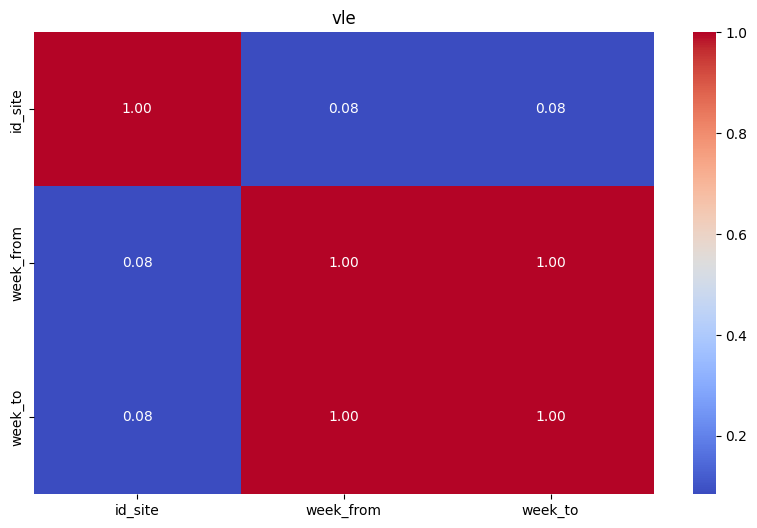

In [5]:
# Korelasi antara variabel numerik
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('vle')
plt.show()


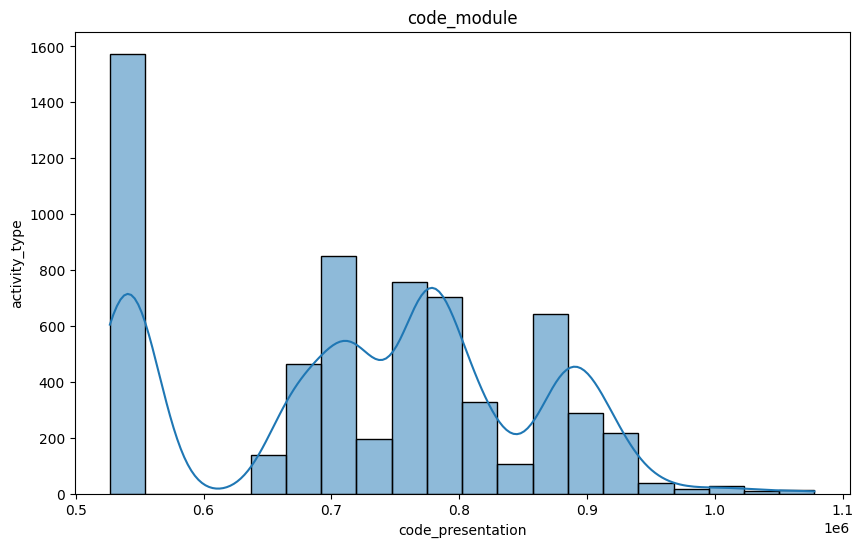

In [6]:
# Visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.histplot(df['id_site'], bins=20, kde=True)
plt.title('code_module')
plt.xlabel('code_presentation')
plt.ylabel('activity_type')
plt.show()


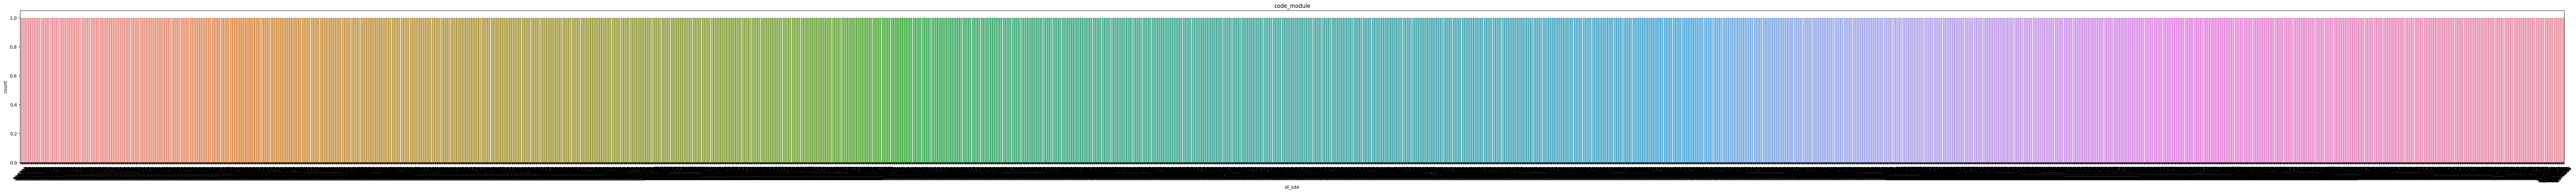

In [8]:
# Visualisasi data kategorikal
plt.figure(figsize=(100, 6))
sns.countplot(x='id_site', data=df)
plt.title('code_module')
plt.xticks(rotation=45)
plt.show()


In [9]:
df['id_site'].fillna(df['id_site'].mean(), inplace=True)
df['id_site'].fillna(df['id_site'].mode()[0], inplace=True)
label_encoder = LabelEncoder()
df['id_site'] = label_encoder.fit_transform(df['id_site'])
scaler = StandardScaler()
df[['id_site', 'week_to']] = scaler.fit_transform(df[['id_site', 'week_to']])
X = df.drop('id_site', axis=1)  # Fitur
y = df['week_to']  # Target

In [10]:
# Menampilkan 5 baris pertama data setelah preprocessing
print(df.head())

# Menampilkan informasi dasar tentang data setelah preprocessing
print(df.info())

    id_site code_module code_presentation activity_type  week_from  week_to
0 -1.210857         AAA             2013J      resource        NaN      NaN
1 -1.248960         AAA             2013J     oucontent        NaN      NaN
2 -1.193439         AAA             2013J      resource        NaN      NaN
3 -1.231541         AAA             2013J           url        NaN      NaN
4 -1.176020         AAA             2013J      resource        NaN      NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   float64
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(3), object(3)
memory usage: 298.4+ KB
